In [22]:
%pip install texttable

In [23]:
# Importing Libraries
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import texttable

In [30]:
# Load all three files
gender = pd.read_csv("C:/Users/aksha/OneDrive/Desktop/titanic/gender_submission.csv")
test = pd.read_csv("C:/Users/aksha/OneDrive/Desktop/titanic/test.csv")
train = pd.read_csv("C:/Users/aksha/OneDrive/Desktop/titanic/train.csv")

# Merge gender_submission with test on PassengerId
test['source'] = 'test'
train['source'] = 'train'

test = pd.merge(test, gender, on='PassengerId', how='left')

# Combine train and test
df = pd.concat([train, test], ignore_index=True)
print(df)

      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

In [35]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked source  
0      0         A/5 21171   7.2500   NaN        S  train  
1      0          PC 17599  71.2833   C85        C  train  
2      0  STON/O2. 3101282   7.9250   NaN        S  train  
3      0            113803  53.1000  C123        S  train  
4      0            

In [36]:
print(df.tail())

      PassengerId  Survived  Pclass                          Name     Sex  \
1304         1305         0       3            Spector, Mr. Woolf    male   
1305         1306         1       1  Oliva y Ocana, Dona. Fermina  female   
1306         1307         0       3  Saether, Mr. Simon Sivertsen    male   
1307         1308         0       3           Ware, Mr. Frederick    male   
1308         1309         0       3      Peter, Master. Michael J    male   

       Age  SibSp  Parch              Ticket      Fare Cabin Embarked source  
1304   NaN      0      0           A.5. 3236    8.0500   NaN        S   test  
1305  39.0      0      0            PC 17758  108.9000  C105        C   test  
1306  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S   test  
1307   NaN      0      0              359309    8.0500   NaN        S   test  
1308   NaN      1      1                2668   22.3583   NaN        C   test  


In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  source       1309 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 133.1+ KB
None


In [32]:
print(df.shape)

(1309, 13)


In [33]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'source'],
      dtype='object')


In [34]:
print(df.describe(include='all'))

        PassengerId     Survived       Pclass                  Name   Sex  \
count   1309.000000  1309.000000  1309.000000                  1309  1309   
unique          NaN          NaN          NaN                  1307     2   
top             NaN          NaN          NaN  Connolly, Miss. Kate  male   
freq            NaN          NaN          NaN                     2   843   
mean     655.000000     0.377387     2.294882                   NaN   NaN   
std      378.020061     0.484918     0.837836                   NaN   NaN   
min        1.000000     0.000000     1.000000                   NaN   NaN   
25%      328.000000     0.000000     2.000000                   NaN   NaN   
50%      655.000000     0.000000     3.000000                   NaN   NaN   
75%      982.000000     1.000000     3.000000                   NaN   NaN   
max     1309.000000     1.000000     3.000000                   NaN   NaN   

                Age        SibSp        Parch    Ticket         Fare  \
cou

In [12]:
print(df['Survived'].value_counts())
print(df['Pclass'].value_counts())
print(df['Sex'].value_counts())

Survived
0    815
1    494
Name: count, dtype: int64
Pclass
3    709
1    323
2    277
Name: count, dtype: int64
Sex
male      843
female    466
Name: count, dtype: int64


In [5]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percent': missing_percent})
print(missing_df)

             Missing Values    Percent
Cabin                  1014  77.463713
Age                     263  20.091673
Embarked                  2   0.152788
Fare                      1   0.076394
PassengerId               0   0.000000
Survived                  0   0.000000
Pclass                    0   0.000000
Name                      0   0.000000
Sex                       0   0.000000
SibSp                     0   0.000000
Parch                     0   0.000000
Ticket                    0   0.000000
source                    0   0.000000


In [7]:
# Fixing missing values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())

# Extracting Title safely
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

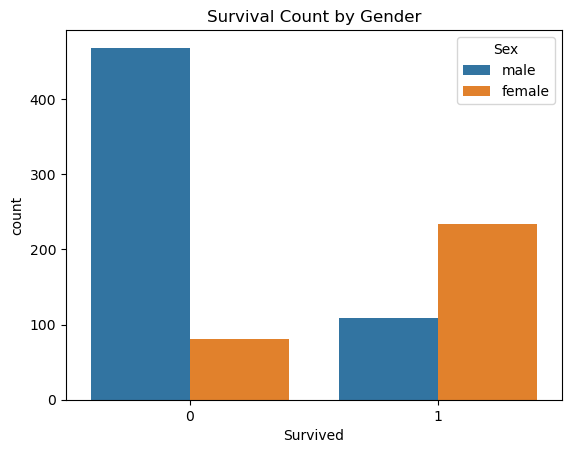

In [8]:
sns.countplot(data=df[df['source'] == 'train'], x='Survived', hue='Sex')
plt.title('Survival Count by Gender')
plt.show()

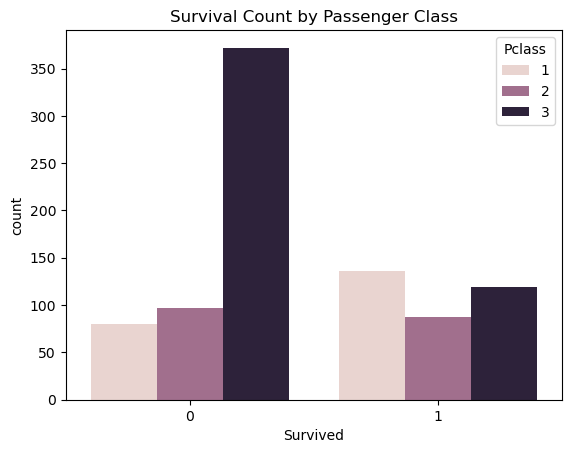

In [9]:
sns.countplot(data=df[df['source'] == 'train'], x='Survived', hue='Pclass')
plt.title('Survival Count by Passenger Class')
plt.show()

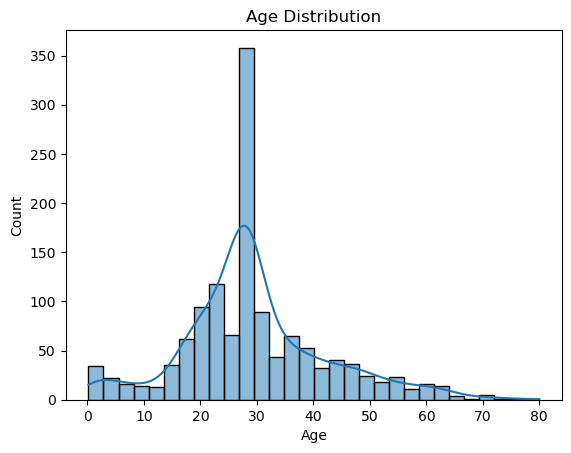

In [10]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

In [15]:
# Create FamilySize and IsAlone
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

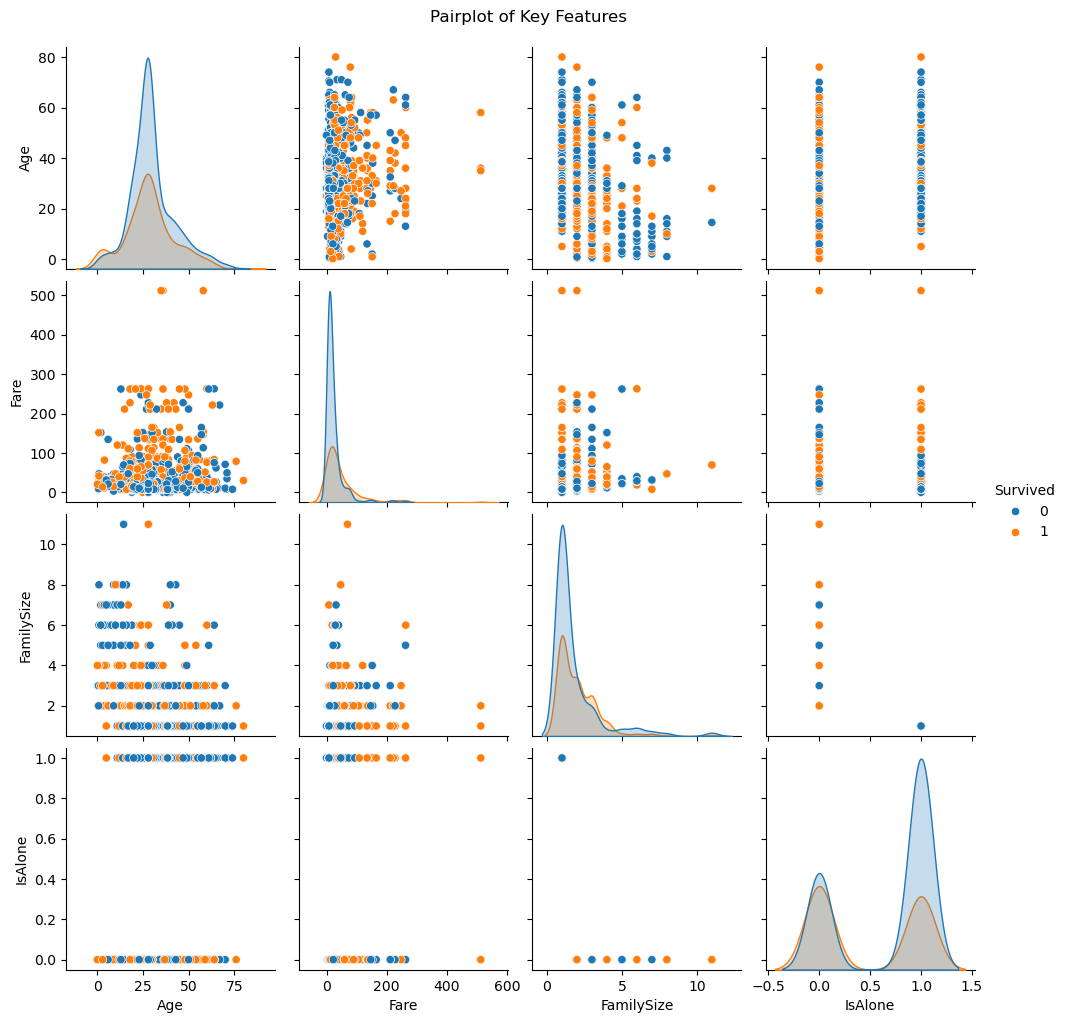

In [16]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'FamilySize', 'IsAlone']], hue='Survived')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

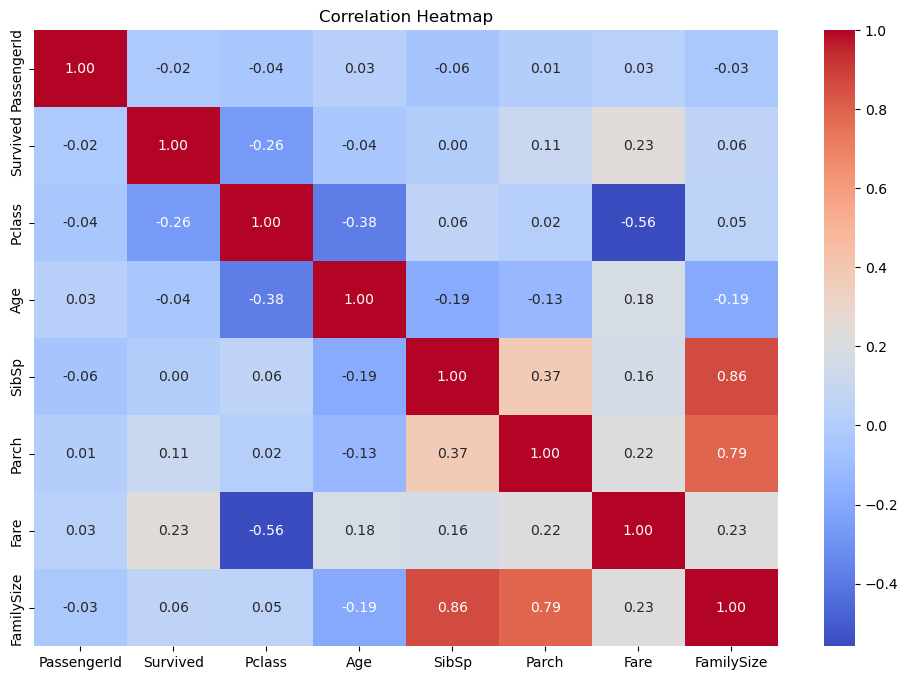

In [18]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

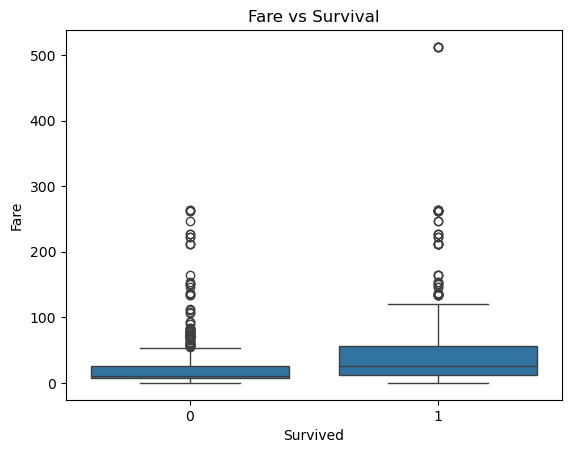

In [19]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survival')
plt.show()

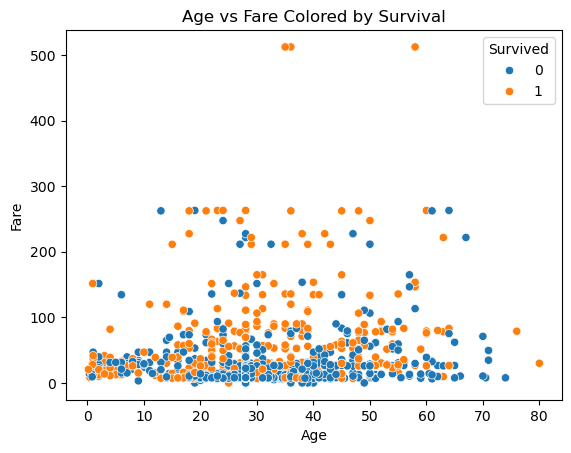

In [20]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Age vs Fare Colored by Survival')
plt.show()

In [24]:
# Create a Texttable object
table = texttable.Texttable()

# Set column headers
table.header(["Visual", "Key Insight"])

# Add rows of data
table.add_row(["Pairplot", "Fare and FamilySize show survival patterns"])
table.add_row(["Heatmap", "Fare, Sex, and Pclass correlate with survival"])
table.add_row(["Age Histogram", "Most passengers were young adults"])
table.add_row(["Fare Boxplot", "Survivors paid higher fares"])
table.add_row(["Age vs Fare Scatter", "High-fare passengers had better survival odds"])

# Print the table
print(table.draw())

+---------------------+-----------------------------------------------+
|       Visual        |                  Key Insight                  |
+=====================+===============================================+
| Pairplot            | Fare and FamilySize show survival patterns    |
+---------------------+-----------------------------------------------+
| Heatmap             | Fare, Sex, and Pclass correlate with survival |
+---------------------+-----------------------------------------------+
| Age Histogram       | Most passengers were young adults             |
+---------------------+-----------------------------------------------+
| Fare Boxplot        | Survivors paid higher fares                   |
+---------------------+-----------------------------------------------+
| Age vs Fare Scatter | High-fare passengers had better survival odds |
+---------------------+-----------------------------------------------+


Final Summary of Findings
 - Survival is strongly influenced by Fare, Pclass, and Gender.
 - Passengers traveling alone had lower survival rates.
 - Titles (like Mrs, Miss) may reflect social status and survival likelihood.
 - Higher Fare often indicates better class and higher survival.
 - Age is not a strong predictor alone but interacts with other features.
